In [2]:
import yfinance as yf
import pandas as pd
tesla=yf.Ticker("TSLA")
tesla_data=tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [4]:
import pandas as pd
import requests
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
html_data = requests.get(url, headers=headers).text
tables = pd.read_html(html_data)
tesla_revenue = tables[1]
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue.tail()

C:\Users\ABC\AppData\Local\Temp\ipykernel_15240\1891788824.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data)


,Date,Revenue
59,2010-09-30,$31
60,2010-06-30,$28
61,2010-03-31,$21
63,2009-09-30,$46
64,2009-06-30,$27


In [6]:
import yfinance as yf
import pandas as pd
gme=yf.Ticker("GME")
gme_data=gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()



,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [7]:
import pandas as pd
import requests
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
html_data = requests.get(url, headers=headers).text
tables = pd.read_html(html_data)
gme_revenue = tables[1]
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
gme_revenue.tail()

C:\Users\ABC\AppData\Local\Temp\ipykernel_15240\1360607936.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data)


,Date,Revenue
61,2010-01-31,"$3,524"
62,2009-10-31,"$1,835"
63,2009-07-31,"$1,739"
64,2009-04-30,"$1,981"
65,2009-01-31,"$3,492"


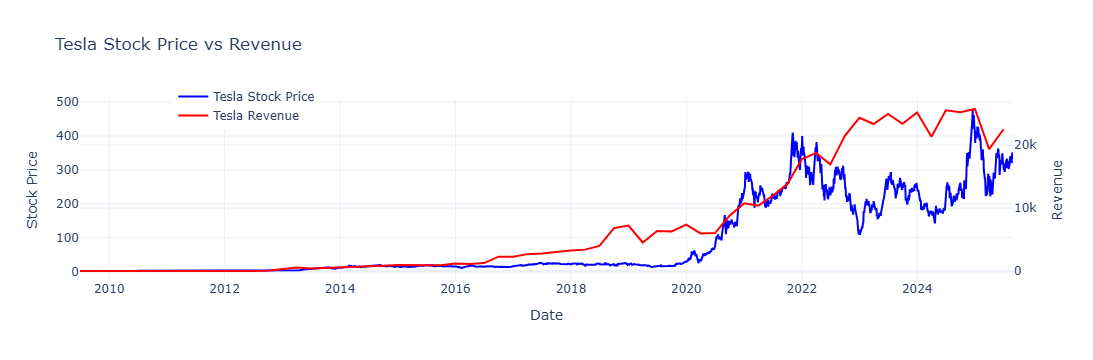

In [8]:
import plotly.graph_objects as go
import pandas as pd
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(str)  # convert to string first
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]  # drop empty strings
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors='coerce')  # convert to numeric
tesla_revenue.dropna(inplace=True)
def make_graph(stock_data, revenue_data, stock_name):
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=stock_data['Date'], 
        y=stock_data['Close'], 
        name=f"{stock_name} Stock Price",
        line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=revenue_data['Date'], 
        y=revenue_data['Revenue'],  # already numeric
        name=f"{stock_name} Revenue",
        line=dict(color='red'),
        yaxis='y2'
    ))
    fig.update_layout(
        title=f"{stock_name} Stock Price vs Revenue",
        xaxis_title="Date",
        yaxis_title="Stock Price",
        yaxis2=dict(
            title="Revenue",
            overlaying='y',
            side='right'
        ),
        legend=dict(x=0.1, y=1.1),
        template="plotly_white"
    )

    fig.show()
make_graph(tesla_data, tesla_revenue, "Tesla")


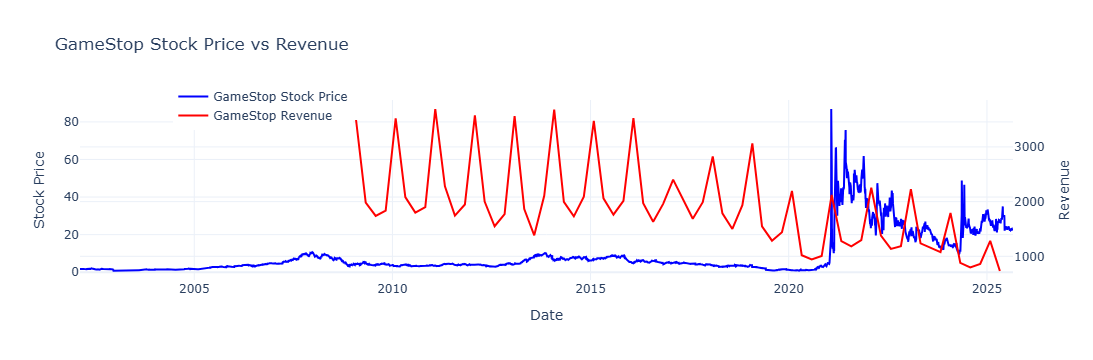

In [12]:
import plotly.graph_objects as go
import pandas as pd
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(str)  # convert to string first
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]  # drop empty strings
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors='coerce')  # convert to numeric
gme_revenue.dropna(inplace=True)
def make_graph(stock_data, revenue_data, stock_name):
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=stock_data['Date'], 
        y=stock_data['Close'], 
        name=f"{stock_name} Stock Price",
        line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=revenue_data['Date'], 
        y=revenue_data['Revenue'],  # numeric
        name=f"{stock_name} Revenue",
        line=dict(color='red'),
        yaxis='y2'
    ))
    fig.update_layout(
        title=f"{stock_name} Stock Price vs Revenue",
        xaxis_title="Date",
        yaxis_title="Stock Price",
        yaxis2=dict(
            title="Revenue",
            overlaying='y',
            side='right'
        ),
        legend=dict(x=0.1, y=1.1),
        template="plotly_white"
    )

    fig.show()
make_graph(gme_data, gme_revenue, "GameStop")